<a href="https://colab.research.google.com/github/syedanida/Clustering/blob/main/clustering_with_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages
!git clone https://github.com/facebookresearch/ImageBind.git
!pip install git+https://github.com/facebookresearch/pytorchvideo.git@eb04d1b21e08cfd0713164c0907aeb4c98fd83af timm==0.6.7 ftfy regex einops fvcore decord==0.6.0
!pip install torchvision

Cloning into 'ImageBind'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 146 (delta 60), reused 39 (delta 39), pack-reused 58 (from 1)
Receiving objects: 100% (146/146), 2.64 MiB | 6.34 MiB/s, done.
Resolving deltas: 100% (68/68), done.
  Cloning https://github.com/facebookresearch/pytorchvideo.git (to revision eb04d1b21e08cfd0713164c0907aeb4c98fd83af) to /tmp/pip-req-build-xxmdx99a
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorchvideo.git /tmp/pip-req-build-xxmdx99a
  Running command git rev-parse -q --verify 'sha^eb04d1b21e08cfd0713164c0907aeb4c98fd83af'
  Running command git fetch -q https://github.com/facebookresearch/pytorchvideo.git eb04d1b21e08cfd0713164c0907aeb4c98fd83af
  Running command git checkout -q eb04d1b21e08cfd0713164c0907aeb4c98fd83af
  Resolved https://github.com/facebookresearch/pytorchvideo.git to commit eb04d1b21

In [3]:
# Import packages
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import os
from PIL import Image

In [4]:
# Download and extract CIFAR-10 dataset
transform = transforms.ToTensor()
cifar10 = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)


Files already downloaded and verified


In [5]:
# Define categories
text_list = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [6]:
# Save images locally (optional step if required for ImageBind input)
os.makedirs("cifar10_images", exist_ok=True)
category_dirs = {category: f"cifar10_images/{category}" for category in text_list}
for category_dir in category_dirs.values():
    os.makedirs(category_dir, exist_ok=True)

In [7]:
# Save images into category folders
from torchvision.transforms import ToPILImage

# Define a transform to convert tensors back to PIL images
to_pil = ToPILImage()

# Save images into category folders
for img, label in cifar10:
    category = text_list[label]
    # Convert the tensor to a PIL image
    pil_img = to_pil(img)
    pil_img.save(f"{category_dirs[category]}/{len(os.listdir(category_dirs[category]))}.png")


In [8]:
# List image paths
def list_images_in_dir(directory_path):
    return [os.path.join(directory_path, f) for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

# Organize images into a dictionary
images_dict = {category: {"images": list_images_in_dir(category_dirs[category])} for category in text_list}

# Display sample image paths
print("Sample images:")
for category, data in images_dict.items():
    print(f"{category}: {len(data['images'])} images.")

Sample images:
airplane: 10000 images.
automobile: 10000 images.
bird: 10000 images.
cat: 10000 images.
deer: 10000 images.
dog: 10000 images.
frog: 10000 images.
horse: 10000 images.
ship: 10000 images.
truck: 10000 images.


In [9]:
!pip install -e ./ImageBind

Obtaining file:///content/ImageBind
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/facebookresearch/pytorchvideo.git (to revision 28fe037d212663c6a24f373b94cc5d478c8c1a1d) to /tmp/pip-install-rwuhzj6q/pytorchvideo_068ef49208264010a68ff510150fc77c
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorchvideo.git /tmp/pip-install-rwuhzj6q/pytorchvideo_068ef49208264010a68ff510150fc77c
  Running command git rev-parse -q --verify 'sha^28fe037d212663c6a24f373b94cc5d478c8c1a1d'
  Running command git fetch -q https://github.com/facebookresearch/pytorchvideo.git 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Running command git checkout -q 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Resolved https://github.com/facebookresearch/pytorchvideo.git to commit 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 36.1 MB/s eta 0:00:00
  Installing build depen

In [1]:
import torch
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Load the ImageBind model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

print("ImageBind model loaded and ready.")

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


  0%|          | 0.00/4.47G [00:00<?, ?B/s]

ImageBind model loaded and ready.


In [10]:
image_paths = []
for category in category_dirs.values():
    image_paths.extend(list_images_in_dir(category))


In [31]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torchvision.transforms.functional as TF
import torch

def denormalize(tensor):
    mean = torch.tensor([0.485, 0.456, 0.406])
    std = torch.tensor([0.229, 0.224, 0.225])
    return tensor * std.view(3, 1, 1) + mean.view(3, 1, 1)

def display_images(batch, title="Sample Images"):
    unnormalized_batch = denormalize(batch)  # Reverse normalization
    grid = make_grid(unnormalized_batch, nrow=2)  # Adjust rows
    np_grid = grid.permute(1, 2, 0).numpy()  # Prepare for plotting
    plt.figure(figsize=(6, 6))  # Adjust size
    plt.title(title)
    plt.imshow(np.clip(np_grid, 0, 1))  # Clip values for display
    plt.axis('off')
    plt.show()


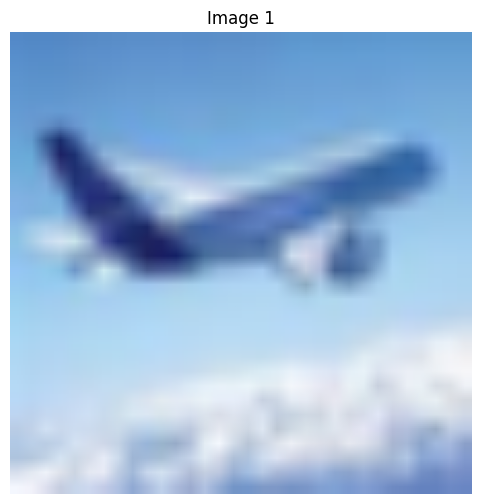

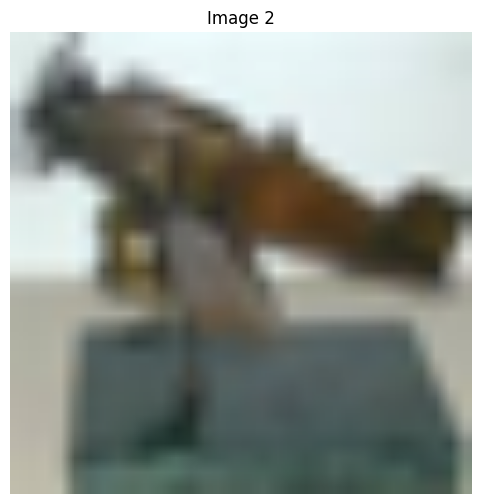

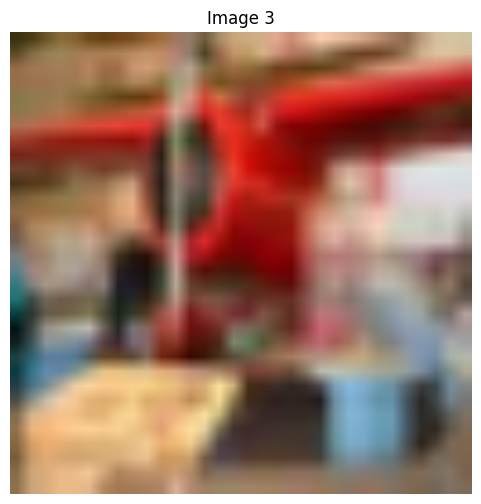

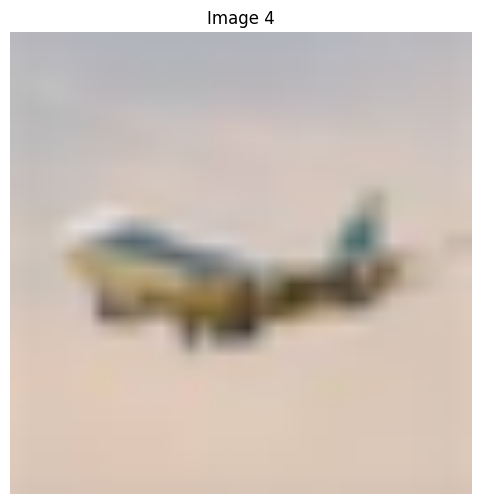

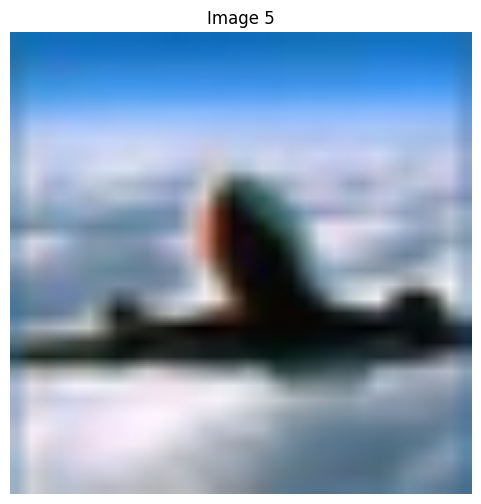

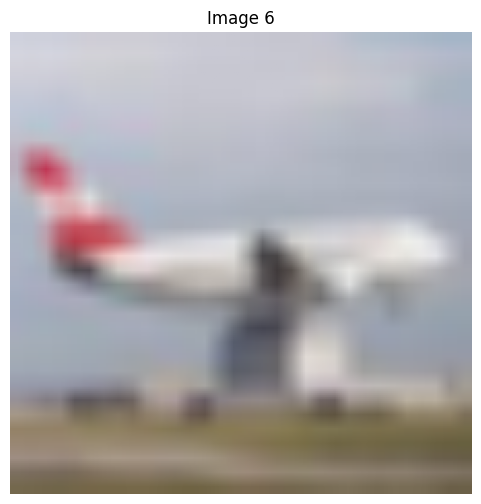

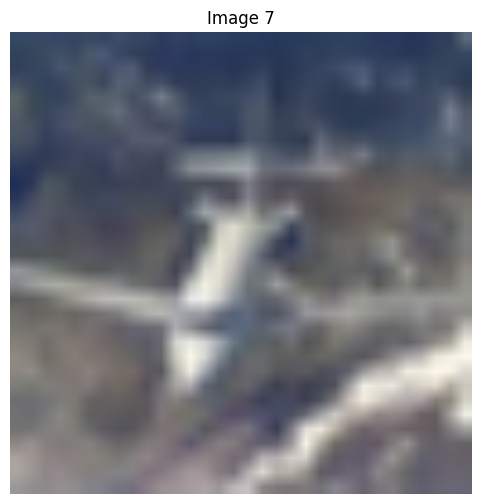

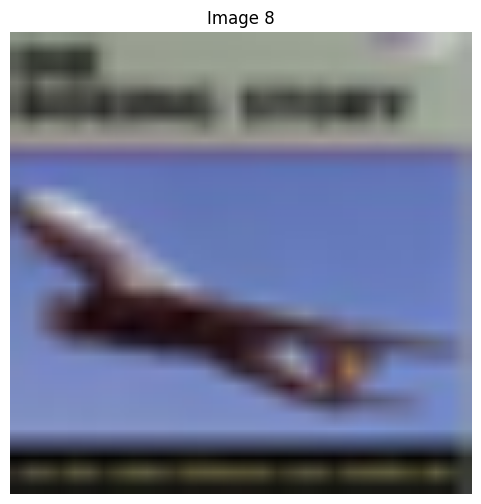

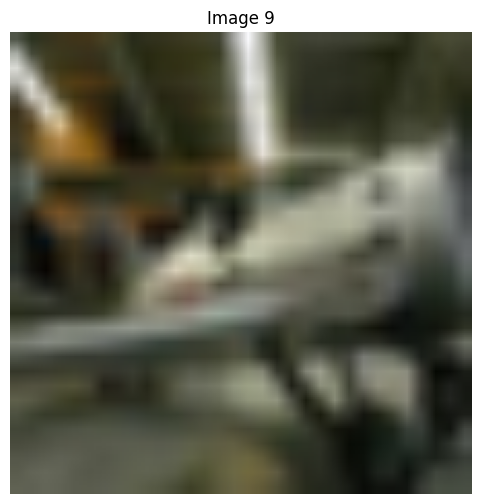

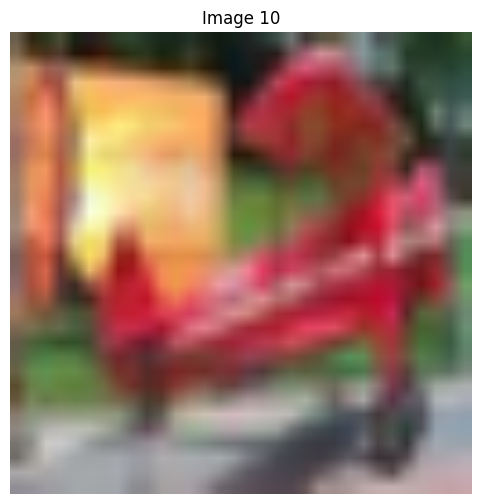

In [32]:
# Display a few images from the DataLoader
def display_sample_images(image_loader, device, num_batches=1):
    with torch.no_grad():
        for i, batch in enumerate(image_loader):
            if i >= num_batches:  # Limit to the specified number of batches
                break
            batch = batch.to(device)  # Send batch to the device
            display_images(batch.cpu(), title=f"Image {i + 1}")

# Display only a few batches
num_batches_to_display = 10  # Adjust to the desired number of batches
display_sample_images(image_loader, device, num_batches=num_batches_to_display)